# Homework 1 - Diagnostic

CAPP 30254

Jonathan Tan

April 3, 2019

## Problem 1: Data Acquisition and Analysis

### 1. Download reported crime data from the Chicago open data portal for 2017 and 2018.

Data was downloaded via the Socrata Open Data API and stored in `/data/crime.csv`. The script to replicate this can be found in `/scripts/data-assembly.py`.

### 2. Generate summary statistics for the crime reports data including but not limited to number of crimes of each type, how they change over time, and how they are different by neighborhood. Please use a combination of tables and graphs to present these summary stats.

In [67]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns

# Import data
crime_df = pd.read_csv("data/crime.csv")
crime_df = crime_df.rename({'Unnamed: 0': 'index'}, axis='columns')

In [68]:
crime_df

,index,arrest,beat,block,case_number,community_area,date,description,district,domestic,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30.0,2017-11-28T21:43:00.000,VIOLENT OFFENDER: ANNUAL REGISTRATION,10.0,False,...,41.843778,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12.0,1158280.0,1886310.0,2017
1,1,True,1221,007XX N SACRAMENTO BLVD,JA545986,23.0,2017-12-11T19:15:00.000,ARMED: HANDGUN,12.0,False,...,41.894476,"{'type': 'Point', 'coordinates': [-87.70216915...",SIDEWALK,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27.0,1156092.0,1904769.0,2017
2,2,False,2222,092XX S RACINE AVE,JB147188,73.0,2017-10-08T03:00:00.000,NON-AGGRAVATED,22.0,False,...,NaN,NaN,RESIDENCE,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,21.0,NaN,NaN,2017
3,3,False,835,026XX W 79TH ST,JB147595,70.0,2017-03-28T14:00:00.000,UNLAWFUL ENTRY,8.0,False,...,NaN,NaN,OTHER,NaN,BURGLARY,2018-02-11T15:57:41.000,18.0,NaN,NaN,2017
4,4,False,313,060XX S EBERHART AVE,JB147230,42.0,2017-09-09T20:17:00.000,OVER $500,3.0,False,...,NaN,NaN,RESIDENCE,NaN,THEFT,2018-02-11T15:57:41.000,20.0,NaN,NaN,2017
5,5,True,215,003XX E 47TH ST,JA522842,38.0,2017-11-23T15:14:00.000,AGGRAVATED: HANDGUN,2.0,False,...,41.809343,"{'type': 'Point', 'coordinates': [-87.61909899...",DEPARTMENT STORE,-87.619099,ASSAULT,2018-06-21T15:59:22.000,3.0,1178967.0,1873924.0,2017
6,6,False,122,001XX W RANDOLPH ST,JB147599,32.0,2017-08-26T10:00:00.000,NON-AGGRAVATED,1.0,False,...,NaN,NaN,HOTEL/MOTEL,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,42.0,NaN,NaN,2017
7,7,False,524,117XX S SANGAMON ST,JB140548,53.0,2018-02-04T01:36:00.000,FIRST DEGREE MURDER,5.0,False,...,41.680739,"{'type': 'Point', 'coordinates': [-87.64566114...",STREET,-87.645661,HOMICIDE,2019-03-18T16:08:09.000,34.0,1172100.0,1827003.0,2018
8,8,False,2433,011XX W GRANVILLE AVE,JB108189,77.0,2018-01-08T06:50:00.000,AUTOMOBILE,24.0,False,...,41.994567,"{'type': 'Point', 'coordinates': [-87.65901631...",STREET,-87.659016,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,48.0,1167554.0,1941332.0,2018
9,9,False,2411,025XX W TOUHY AVE,JB108139,2.0,2018-01-07T21:00:00.000,AUTOMOBILE,24.0,False,...,42.012201,"{'type': 'Point', 'coordinates': [-87.69390481...",STREET,-87.693905,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,50.0,1158022.0,1947685.0,2018


#### How often is each crime reported in the data?

The most-commonly reported category of crimes is "THEFT", while the least commonly reported category of crime is "NON-CRIMINAL (SUBJECT SPECIFIED)".

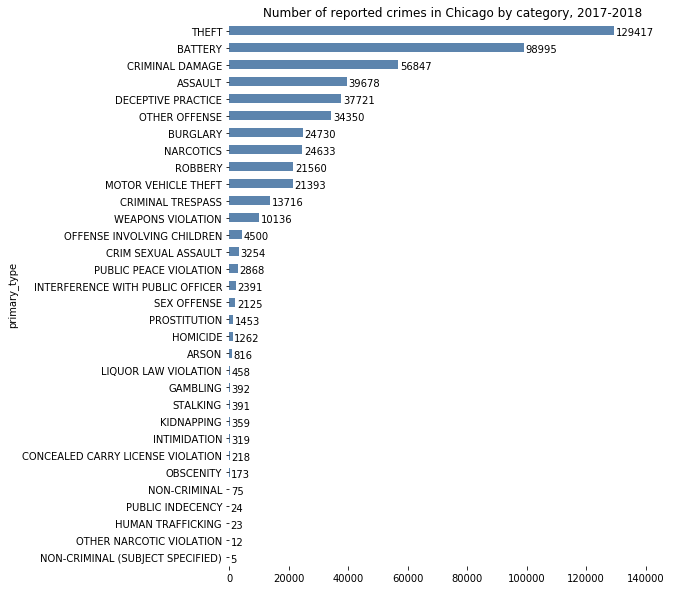

In [186]:
# Group by primary_type, count number of rows in each, then sort in ascending order
crime_by_type = crime_df \
    .groupby(['primary_type'])[['index']] \
    .count() \
    .rename({'index': 'count'}, axis='columns') \
    .sort_values(by='count')

# plot results
ax1 = crime_by_type.plot.barh(title='Number of reported crimes in Chicago by category, 2017-2018',
                             legend=False,
                             figsize=(8, 10),
                             xlim=(0, 150000),
                             color=(0.2, 0.4, 0.6, 0.8))

# add bar labels
# Code adapted from https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for p in ax1.patches:
    ax1.annotate(str(p.get_width()),
                 (p.get_width() + 500, p.get_y()))

# remove border 
# Code adapted from https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
for edge in ('top', 'right', 'bottom', 'left'):
    ax1.spines[edge].set_visible(False)

#### How have reports for each crime changed between 2017 and 2018?

The total number of reported crimes stayed relatively stable between 2017 and 2018, falling slightly by 0.7%.

In [184]:
crime_df.groupby(['year']).size().pct_change()

year
2017        NaN
2018   -0.00702
dtype: float64

The category of crime that has seen the largest percentage increase between 2017 and 2018 is "CONCEALED CARRY LICENSE VIOLATION" (+116%), while the category that has seen the largest percentage decrease is "OTHER NARCOTIC VIOLATION" (-91%).

Additionally, reports of theft - the most common category of crime overall - stayed relatively stable and only increased by 1.1%. 

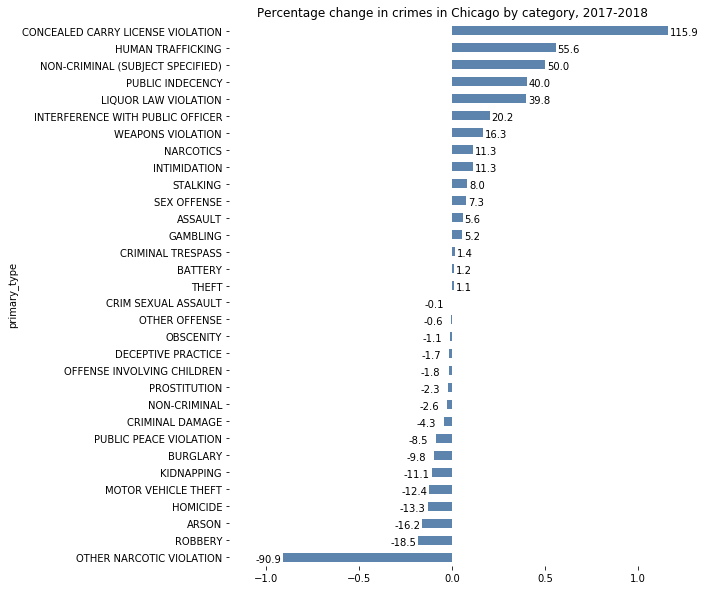

In [272]:
# Group by primary_type and year, count the number of rows in each type-year, 
#  calculate the percentage change from 2017 to 2018 for each year, 
pct_change_df = crime_df \
    .groupby(['primary_type', 'year'])[['index']] \
    .count() \
    .pct_change() \
    .reset_index()

# Filter to only show 2018 values, then sort by value
pct_change_df = pct_change_df \
    .loc[pct_change_df.year == 2018] \
    .sort_values(by='index') \
    .rename({'index': 'pct_change'}, axis='columns')

# plot
ax2 = pct_change_df.plot.barh(x='primary_type',
                              y='pct_change',
                              title='Percentage change in crimes in Chicago by category, 2017-2018',
                              legend=False,
                              figsize=(8, 10), 
                              xlim=(-1.2, 1.2),
                              color=(0.2, 0.4, 0.6, 0.8))

# add bar labels
for p in ax2.patches:
    if p.get_width() > 0:
        ax2.annotate(str(round(p.get_width() * 100, 1)),
                     (p.get_width() + 0.01, p.get_y()))
    else:
        ax2.annotate(str(round(p.get_width() * 100, 1)),
                     (p.get_width() - 0.15, p.get_y()))
    
# remove border 
for edge in ('top', 'right', 'bottom', 'left'):
    ax2.spines[edge].set_visible(False)

#### How do crimes differ by neighborhood?

In [289]:
# Count number of reported crimes by community_area
crime_by_area = crime_df \
    .groupby(['community_area']) \
    .size() \
    .reset_index() \
    .rename({0: 'count'}, axis='columns')

# change ID for community_area from float to int to string
crime_by_area.community_area = crime_by_area.community_area.astype(int).astype(str)
crime_by_area.sort_values(by='count', ascending=False).head()

,community_area,count
25,25,30424
8,8,25365
32,32,21479
28,28,18446
29,29,18373


There are 77 community areas in Chicago, so a table isn't particularly effective here at showing patterns (if any) by area. Instead, we'll get a basemap of Chicago from the Chicago Open Data Portal to plot our data against.

In [ ]:
# First, get Chicago basemap
import requests
import geopandas as gpd
import descartes  # to plot polygons in geopandas
import shapely # to work directly with geometric objects

chicago_url = 'https://data.cityofchicago.org/resource/igwz-8jzy.geojson'
chicago_gjson = requests.get(chicago_url).json()
chicago_gdf = gpd.GeoDataFrame.from_features(chicago_gjson)

Next, we'll take the counts of reported crime from above and merge it onto the neighborhood data so we can plot it.

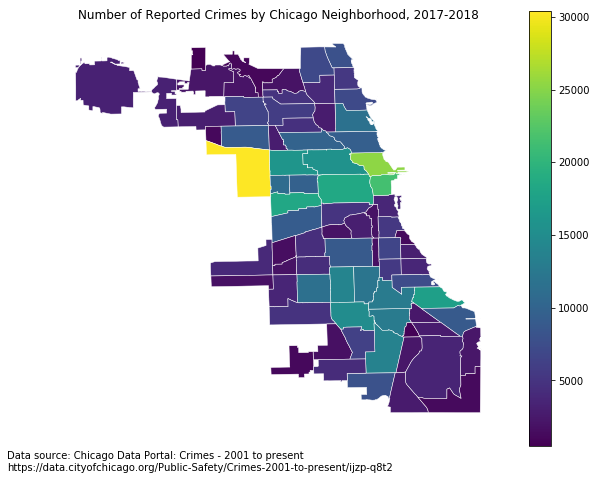

In [286]:
# Merge count of reported crime onto each community area
crime_gdf = chicago_gdf.merge(crime_by_area,
                              how='inner',
                              left_on='area_num_1', right_on='community_area')

# Plot the map
ax3 = crime_gdf.plot(edgecolor='white',
                     linewidth=0.5,
                     column='count', 
                     figsize=(10, 8),
                     legend=True)

# Some visual tweaks
plt.title('Number of Reported Crimes by Chicago Neighborhood, 2017-2018')
plt.axis('off')
plt.text(-88.01, 41.585, 
         "Data source: Chicago Data Portal: Crimes - 2001 to present \nhttps://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2")
plt.show()

From the map, we can tell that the total number of reported crimes between 2017 and 2018 was highest in Austin, followed by the Near North Side and the Loop. 

What about neighborhood patterns for specific kinds of crimes?

In [288]:
# 1. Theft

# Count number of reported crimes by community_area
theft_by_area = crime_df[crime_df.primary_type == "THEFT"] \
    .groupby(['community_area']) \
    .size() \
    .reset_index() \
    .rename({0: 'count'}, axis='columns')

# change ID for community_area from float to int to string
theft_by_area.community_area = theft_by_area.community_area.astype(int).astype(str)
theft_by_area.sort_values(by='count', ascending=False).head()

,community_area,count
7,8,12022
31,32,11672
27,28,6944
23,24,5875
6,7,4735


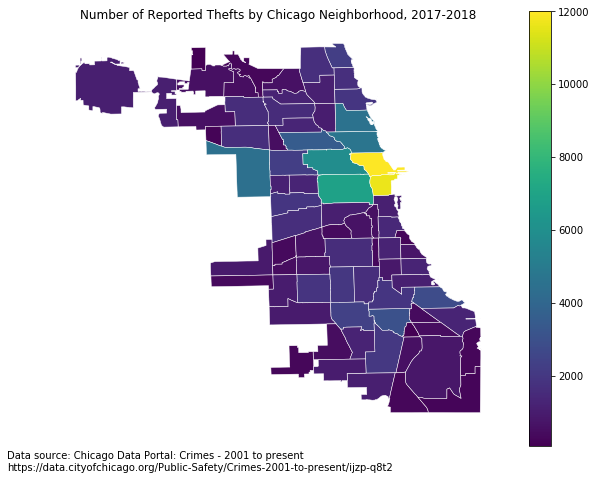

In [290]:
# Merge count of reported crime onto each community area
theft_gdf = chicago_gdf.merge(theft_by_area,
                              how='inner',
                              left_on='area_num_1', right_on='community_area')

# Plot the map
ax4 = theft_gdf.plot(edgecolor='white',
                     linewidth=0.5,
                     column='count', 
                     figsize=(10, 8),
                     legend=True)

# Some visual tweaks
plt.title('Number of Reported Thefts by Chicago Neighborhood, 2017-2018')
plt.axis('off')
plt.text(-88.01, 41.585, 
         "Data source: Chicago Data Portal: Crimes - 2001 to present \nhttps://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2")
plt.show()

In [ ]:
# THEFT, BATTERY, CRIMINAL DAMAGE, ASSAULT, DECEPTIVE PRACTICE
# Small multiples code adapted from https://joelotz.github.io/small-multiples-in-matplotlib.html
# Also looked at https://python-graph-gallery.com/125-small-multiples-for-line-chart/